<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal:**
Our goal of this project is to study air quality trends over time and understand the impact of factors like weather conditions (temperature and humidity) and proximity to industrial areas on pollution levels. We also aim to create models to predict pollution levels based on these factors.

# **Source**:
(https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment)

# **General information about the dataset:**
**Dataset Title:** Air Quality Prediction Dataset

**Number of Attributes:** 9 attributes


**Attribute Explanation:**

**Temperature (°C):** Continuous numerical attribute representing the average temperature of the region.

**Humidity (%):** Continuous numerical attribute representing relative humidity recorded in the region.

**PM2.5 Concentration (µg/m³):** Continuous numerical attribute measuring fine particulate matter levels.

**PM10 Concentration (µg/m³):** Continuous numerical attribute measuring coarse particulate matter levels.

**NO2 Concentration (ppb):** Continuous numerical attribute measuring nitrogen dioxide levels.

**SO2 Concentration (ppb):** Continuous numerical attribute measuring sulfur dioxide levels.

**CO Concentration (ppm):** Continuous numerical attribute measuring carbon monoxide levels.

**Proximity to Industrial Areas (km):** Continuous numerical attribute representing the distance to the nearest industrial zone.

**Population Density (people/km²):** Continuous numerical attribute representing the number of people per square kilometer in the region.

In [ ]:
import pandas as pd
import os
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/pollution%20dataset.csv')


In [ ]:
#Display the attribute names
print ("Attribute names: \n", df.columns)

Attribute names: 
 Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')


In [ ]:
#Display tha data types of each attribute
print ("Data types: \n", df.dtypes)

Data types: 
 Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object


<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/pollution%20dataset.csv')


# **Summary of Raw Data**
Raw data is unprocessed information gathered from different sources, that has not yet been analyzed or organized. It consists of original data points that often require cleaning and processing before they can provide valuable insights.

### **Displaying raw data**

In [2]:
summary = df.describe()

print("Summary of the dataset:")
print(summary)

Summary of the dataset:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000              

In [3]:
import matplotlib.pyplot as plt
air_quality_distribution = df['Air Quality'].value_counts()
print("Air Quality:\n", air_quality_distribution)

Air Quality:
 Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


**Sampling**

### **Statistical Measures:**
Descriptive statistics for numeric values summarize key features of a dataset.


**Min:** The minimum value in the dataset.

**Q1 (25%):** The first quartile, representing the value below which 25% of the data fall.

**Median (50%):** The middle value when the data is sorted in ascending order.

**Q3 (75%):** The third quartile, representing the value below which 75% of the data fall.

**Max:** The maximum value in the dataset.

In [4]:
statistical_measures = df.describe(percentiles=[.25, .5, .75]).transpose()

# To get min, Q1, median, Q3, max:
statistical_measures = statistical_measures[['min', '25%', '50%', '75%', 'max']]

statistical_measures.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

# Display the results
print(statistical_measures)

                                  Min      Q1  Median       Q3     Max
Temperature                     13.40   25.10   29.00   34.000   58.60
Humidity                        36.00   58.30   69.80   80.300  128.10
PM2.5                            0.00    4.60   12.00   26.100  295.00
PM10                            -0.20   12.30   21.70   38.100  315.80
NO2                              7.40   20.10   25.30   31.900   64.90
SO2                             -6.20    5.10    8.00   13.725   44.90
CO                               0.65    1.03    1.41    1.840    3.72
Proximity_to_Industrial_Areas    2.50    5.40    7.90   11.100   25.80
Population_Density             188.00  381.00  494.00  600.000  957.00


The summary of statistical measures gave insights on key pollutants including PM2.5, with levels ranging from 0.00 to 295.00 µg/m³ and a median of 12.00 µg/m³, suggesting moderate air quality but with spikes in some areas. PM10 also exhibits a similar pattern with a range of -0.20 - 315.80 and a median of 21.70. , The presence of high PM2.5 and PM10 levels suggests areas with poor air quality.

Nitrogen dioxide (NO2) levels range from 7.40 to 64.90 µg/m³. In contrast, sulfur dioxide (SO2) Range -6.20 - 44.90, with a median of 8.00, and carbon monoxide (CO) Range 0.65 - 3.72, with a median of 1.41 levels are both relatively low, indicating minimal industrial activity and combustion-related pollution.

The temperature ranged from 13.40 to 58.60, with a median of 29.00. indicating temperature varies significantly, possibly from the different seasons or geographical locations. On the other hand, Humidity range was 36.00 - 128.10, with a median of 69.80. Humidity levels are relatively high.

The Population Density range 188.00 - 957.00, with a median of 494.00. meaning Population density varies significantly, indicating a mix of urban and rural areas. and the Proximity to Industrial Areas range was 2.50 - 25.80, with a median of 7.90. This measure suggests being closer to industrial areas is associated with higher levels of (PM2.5 and PM10) in the air.

### **Variables Distribution**
Variable distribution refers to the way the values of a specific variable are spread or organized within a dataset. It indicates the frequency or likelihood of different outcomes for that variable, helping to uncover patterns, trends, and potential anomalies.


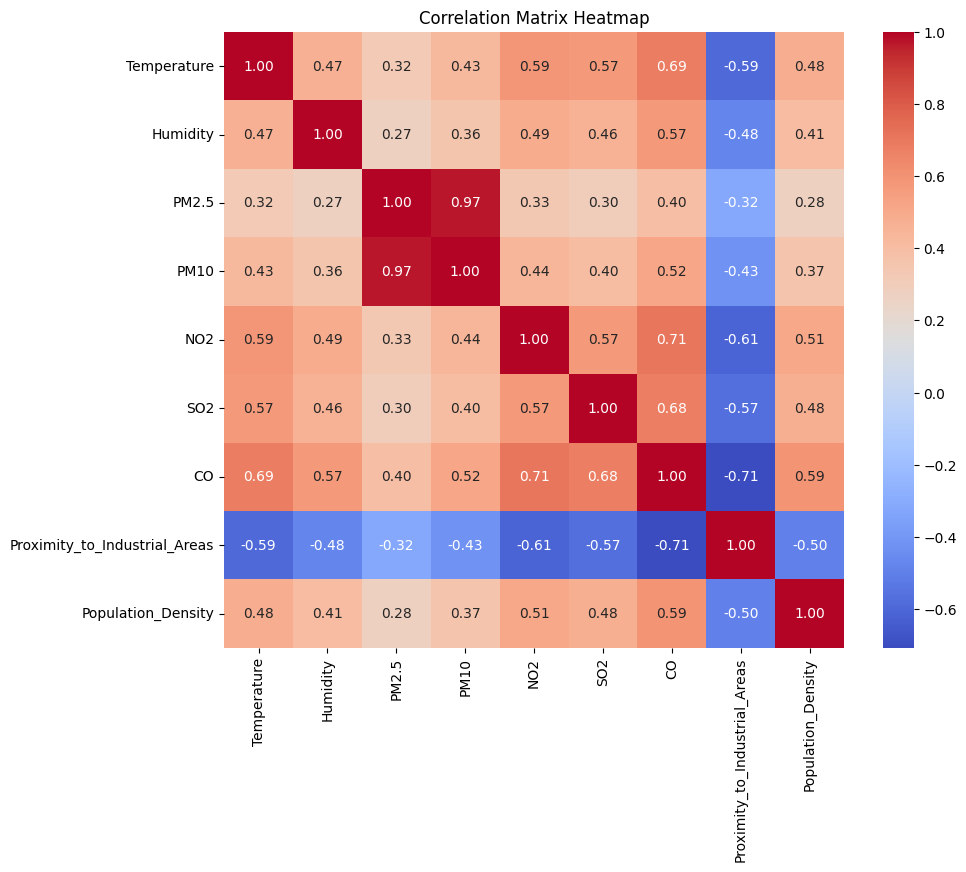

In [5]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Positive Correlations:**

PM2.5 and PM10 are strongly related. If one increases, the other also increases. This is because they both come from similar pollution sources.

NO2 and CO may also have a strong connection since they both come from cars and factories.

**Negative Correlations:**

Temperature and pollution might have a negative Correlation. When the temperature is high, pollution spreads out more, but when it is low, pollution stays in the air.

Air quality and industrial areas/population density might be related. More factories and people can mean more pollution.

**Class Imbalance Detection**

***For the class label***

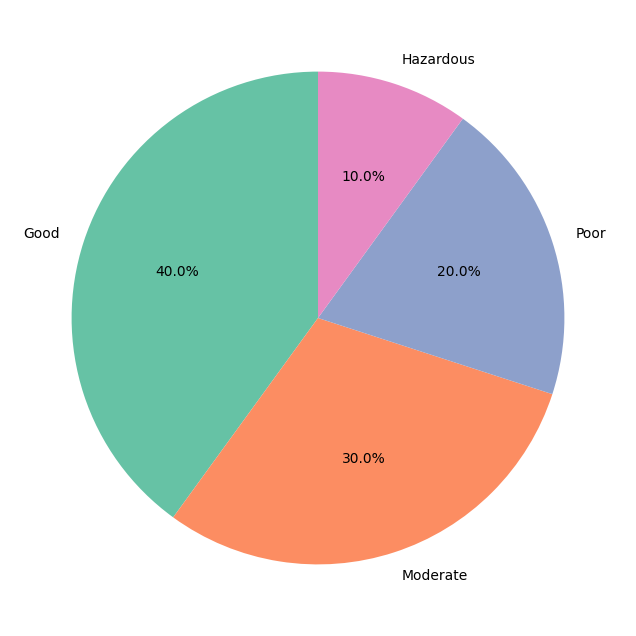

In [6]:
import matplotlib.pyplot as plt

class_counts = df['Air Quality'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.show()



The dataset is imbalanced because the "Hazardous" class has much fewer samples compared to "Good".

**For all numeric Variables**

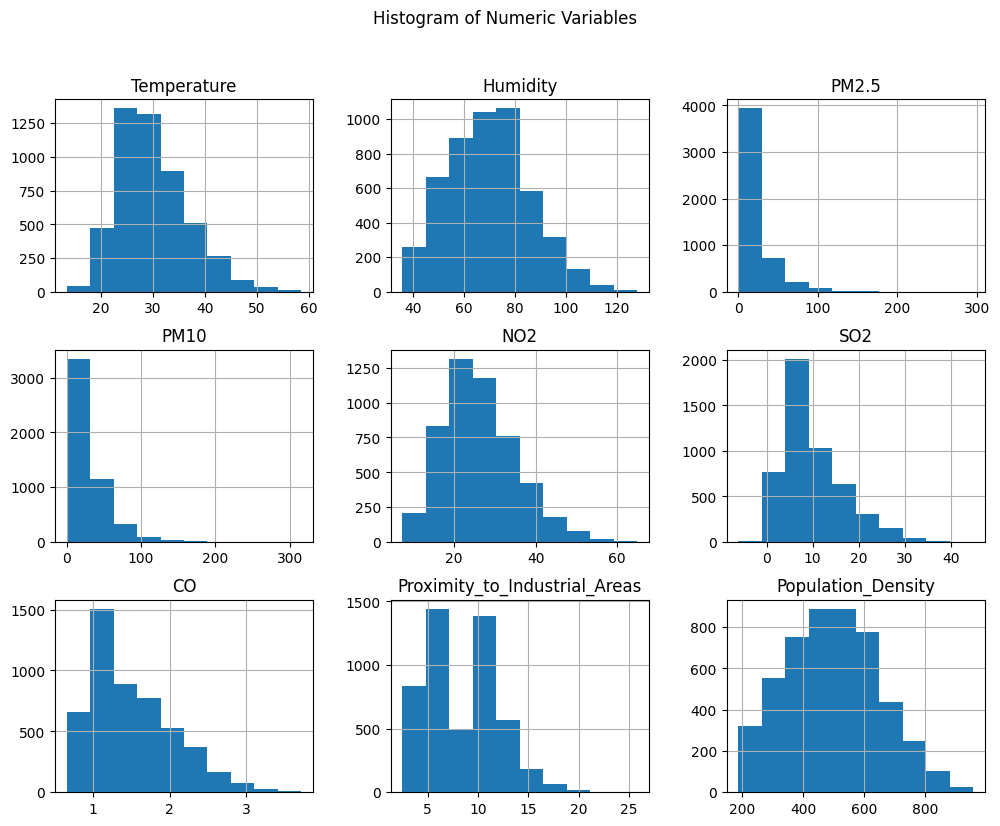

In [7]:
import seaborn as sns

df.hist(figsize=(12, 9))
plt.suptitle('Histogram of Numeric Variables')

plt.show()

**Data Sampling Using RandomOverSampler Method**

In [8]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

ran = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ran.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled])

print (df_resampled['Air Quality'].value_counts()) #to check if the classes are balanced

Air Quality
Moderate     2000
Good         2000
Hazardous    2000
Poor         2000
Name: count, dtype: int64


# Data Representation

Visualizing data through graphs helps us understand patterns in datasets. For analysis we used scatter plot, bar chart, and box plot.


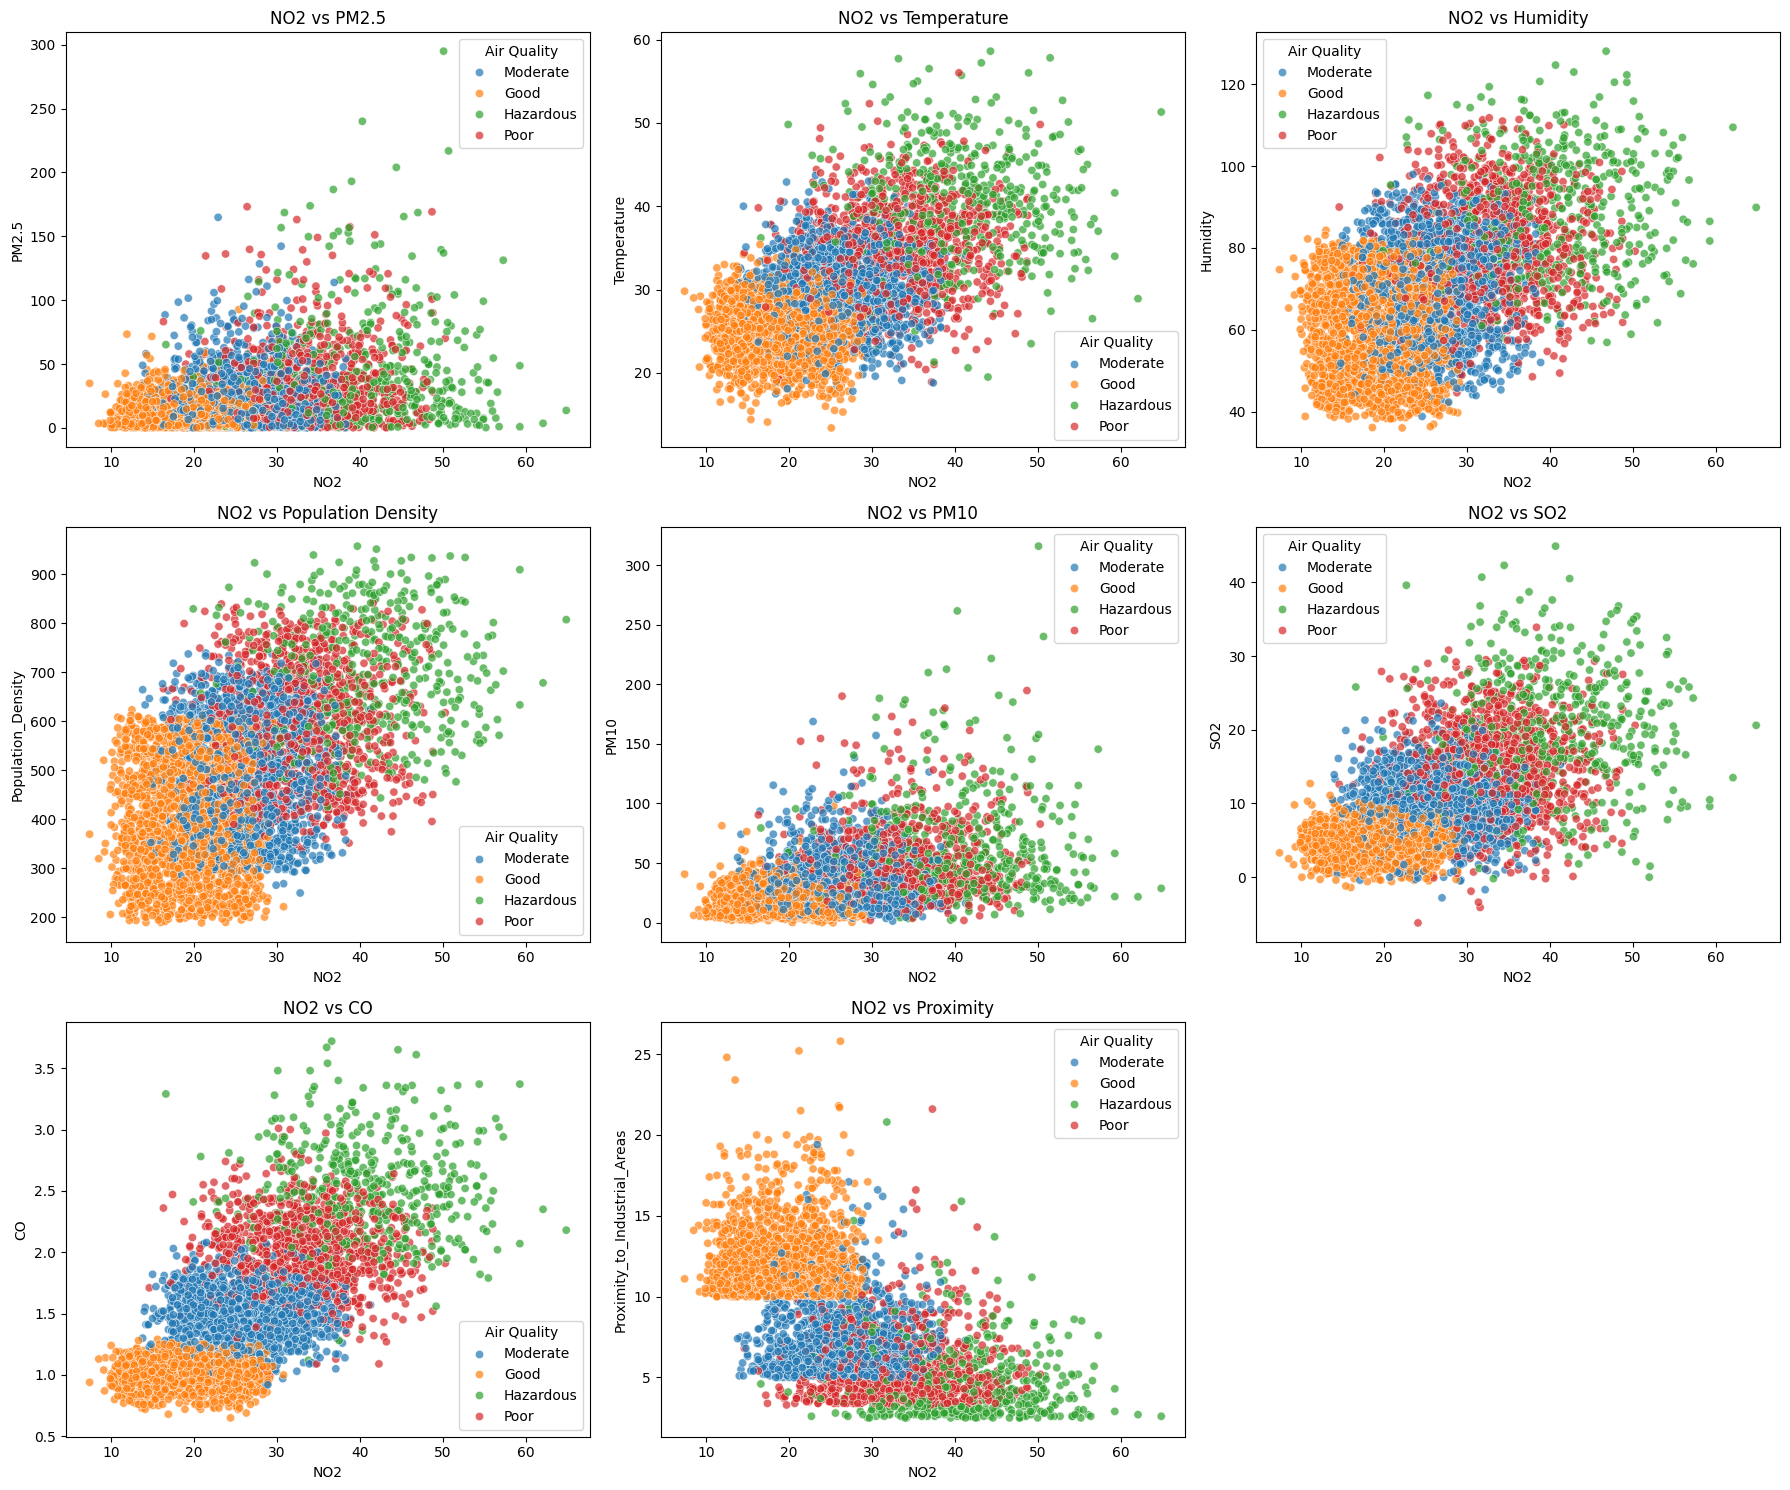

In [9]:
# creating the grid of the subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

sns.scatterplot(data=df, x='NO2', y='PM2.5', ax=axes[0][0], hue='Air Quality', alpha=0.7)
axes[0][0].set_title('NO2 vs PM2.5')

sns.scatterplot(data=df, x='NO2', y='Temperature', ax=axes[0][1], hue='Air Quality', alpha=0.7)
axes[0][1].set_title('NO2 vs Temperature')

sns.scatterplot(data=df, x='NO2', y='Humidity', ax=axes[0][2], hue='Air Quality', alpha=0.7)
axes[0][2].set_title('NO2 vs Humidity')

sns.scatterplot(data=df, x='NO2', y='Population_Density', ax=axes[1][0], hue='Air Quality', alpha=0.7)
axes[1][0].set_title('NO2 vs Population Density')

sns.scatterplot(data=df, x='NO2', y='PM10', ax=axes[1][1], hue='Air Quality', alpha=0.7)
axes[1][1].set_title('NO2 vs PM10')

sns.scatterplot(data=df, x='NO2', y='SO2', ax=axes[1][2], hue='Air Quality', alpha=0.7)
axes[1][2].set_title('NO2 vs SO2')

sns.scatterplot(data=df, x='NO2', y='CO', ax=axes[2][0], hue='Air Quality', alpha=0.7)
axes[2][0].set_title('NO2 vs CO')

sns.scatterplot(data=df, x='NO2', y='Proximity_to_Industrial_Areas', ax=axes[2][1], hue='Air Quality', alpha=0.7)
axes[2][1].set_title('NO2 vs Proximity')

# remove last empty subplot because we only need 8
fig.delaxes(axes[2][2])

plt.tight_layout()
plt.show()

1) The first scatterplot shows a positive correlation showing that higher NO₂ levels are associated with higher PM2.5 levels. This suggests that both polllutants may come from the same sources

2) The second scatterplot shows us that temperature and NO2 don't seem to have a strong relationship. Poor and hazardous air quality areas seem to exist in diverse temperature ranges which indicates that other factors may play a larger role than temperature

3) The third scatterplot also shows that there doesn't seem to be a strong relationship between humidity and NO2 since hazardous and poor air categories exist in different humidity ranges.

4) The fourth scatterplot shows us that there seems to be a moderate relation between NO2 and population density, with poor and hazardous air quality being more prevalent in populated areas likely because of the increased traffic

5)The fifth scatterplot shows a positive correlation between NO2 and PM10, which might be because of similar sources and factors

6)The sixth scatterplot seems to show a positive correlation between NO2 and SO2 but weaker than the ones with PM2.5 and PM10

7)This scatterplot shows a positive correlation between NO2 and CO which may also suggest that they have common sources

8) This scatterplot shows a positive correlation between NO2 and proximity which could because higher NO2 levels can come from industrial emissions

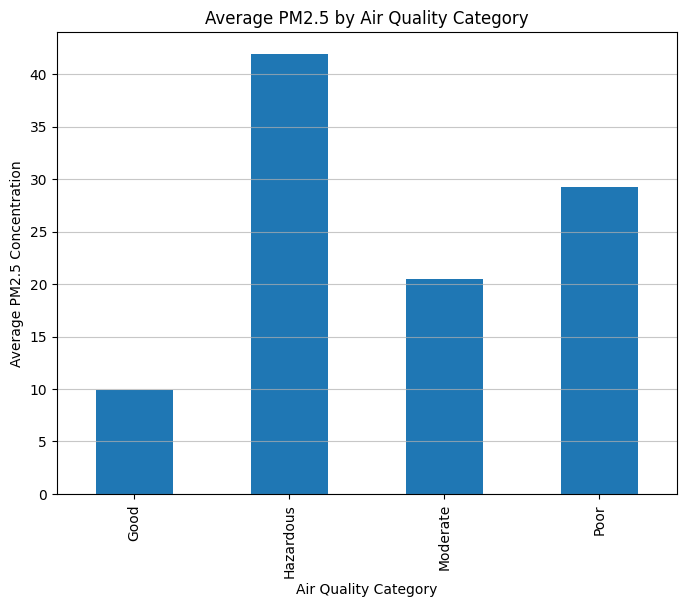

In [10]:
#to calculate the PM2.5 mean for each air quality group
pm25_by_air_quality = df.groupby('Air Quality')['PM2.5'].mean()
plt.figure(figsize=(8, 6))
pm25_by_air_quality.plot(kind='bar')
plt.xlabel("Air Quality Category")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Average PM2.5 by Air Quality Category")
plt.grid(axis='y', alpha=0.7)
plt.show()



The above bar chart shows that when PM2.5 increases, air quality becomes worse. Good air quality has the lowest average amount of PM2.5 and Hazardous has the highest average of PM2.5

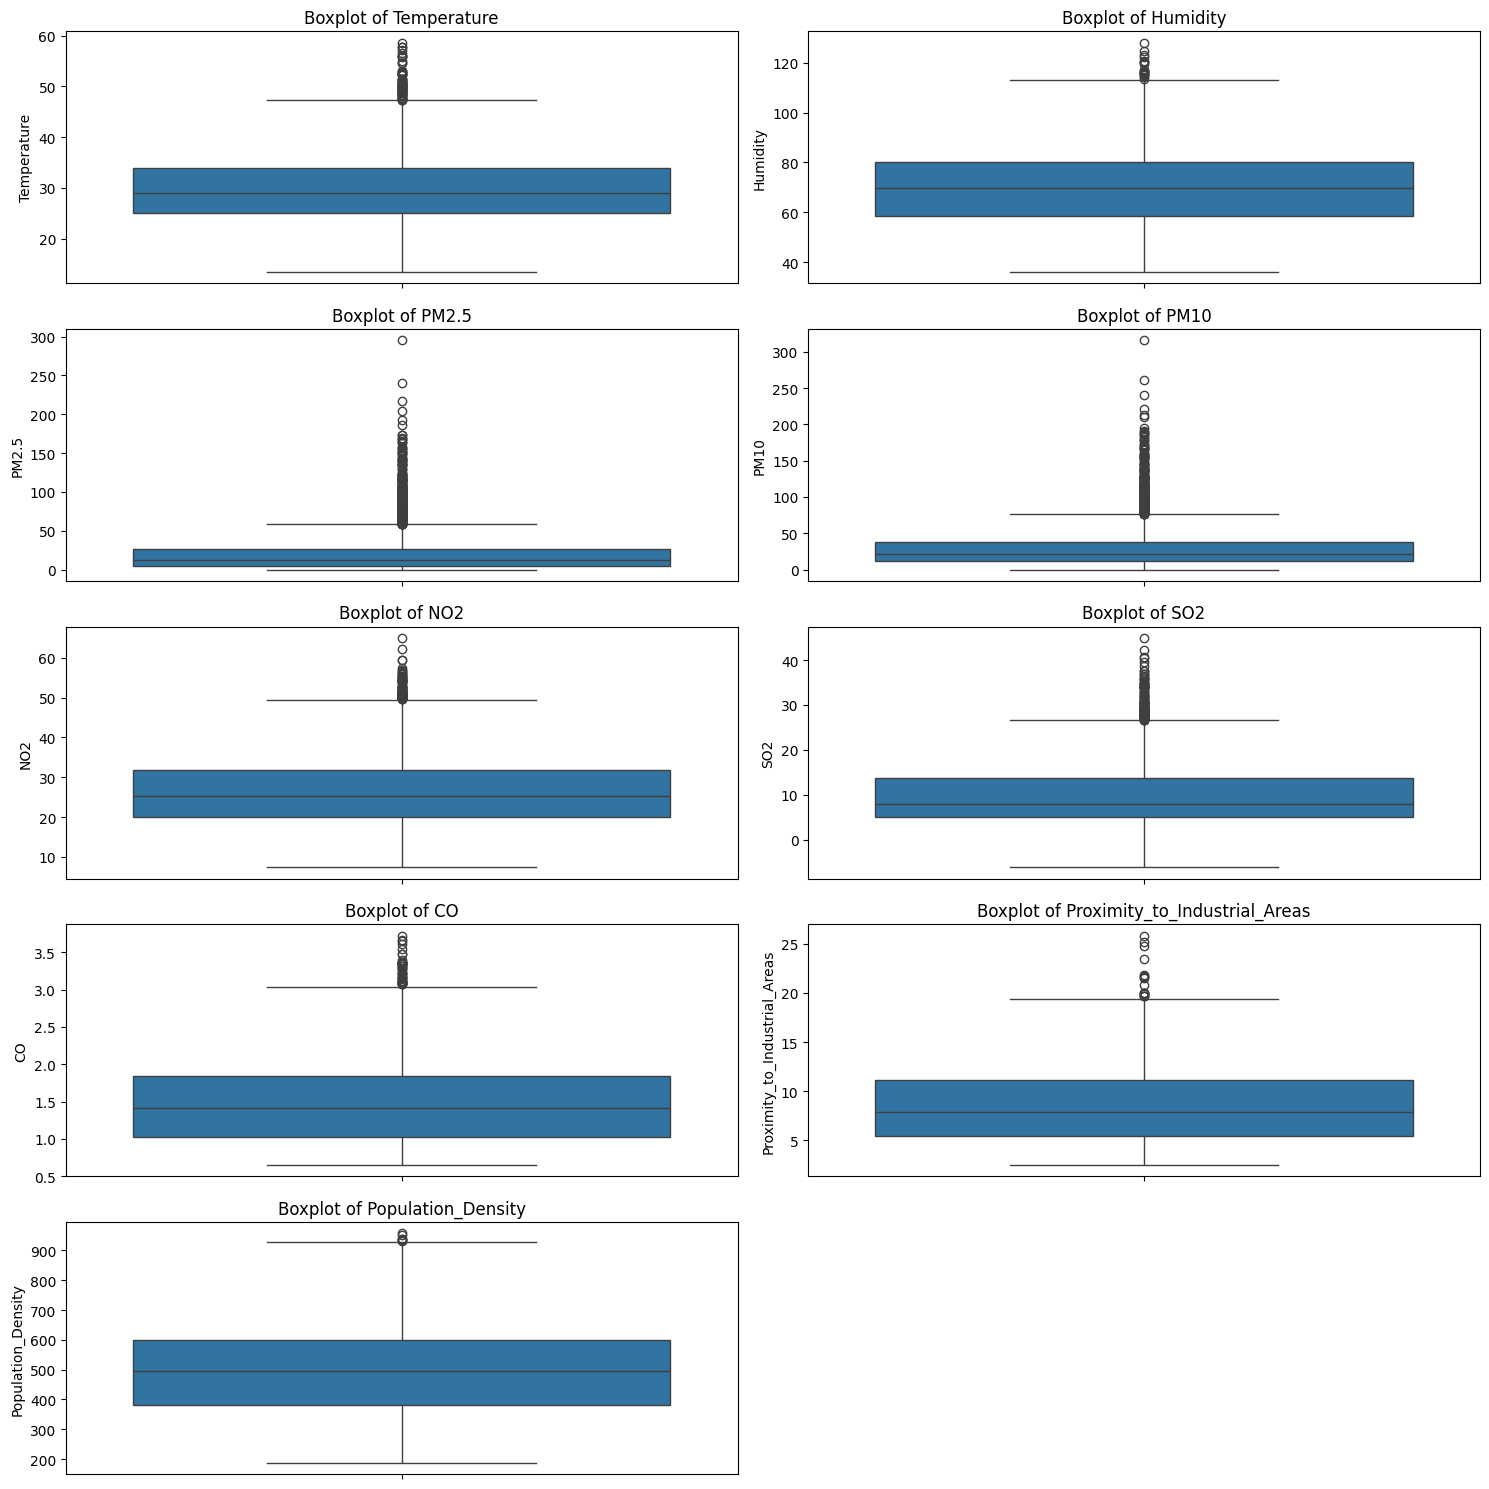

In [11]:
#to choose only numerical columns
int_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 15))
#looping through columns to create boxplot
for i, col in enumerate(int_cols, 1):
    plt.subplot((len(int_cols) + 1) // 2, 2, i)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(y=df[col])
    plt.tight_layout()

plt.show()

The boxplot above gives insight into some observations:
The air pollutants(PM2.5, PM10, NO2, SO2, CO) are right skewed with outliers (because of areas with very high pollution) and have somewhat similar patterns
Temperature & humidity have outliers on the right whisker indicating extreme weather
Proximity to industrial areas has somewhat spread out outliers whereas population density has close outliers likely for highly populated cities





# **Data Preprocessing**
Before we proceed with data analysis, we need to clean the dataset to ensure accurate and reliable results.


### **Remove Noise**

Noisy data consists of errors, outliers, missing values, or inconsistencies that can affect the accuracy of our model. We will address this by:

- Removing unnecessary columns.

- Handling the missing values.

- Detecting and removing outliers.

### **Delete Unnecessary Columns**

Since no columns have been specifically identified as unnecessary, we will retain all columns for the time being.

### **Detect and Handle Missing Values**


In [12]:
missing_values = df.isna().sum()

print('Missing values in each column:')
print(missing_values)

print('\nTotal number of missing values:', missing_values.sum())

Missing values in each column:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Total number of missing values: 0


**Note:** The dataset doesn't have any missing values. But, just in case, we will replace any missing values with the mean of the corresponding columns.

In [13]:
column_means = df.mean(numeric_only=True)
df.fillna(column_means, inplace=True)
print(df.fillna)

<bound method NDFrame.fillna of       Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2

### **Detect and Remove Outliers**
We will use the Z-Score Method to identify and remove extreme outliers in our numerical data.
(Z-Score is a statistical measure that shows how many standard deviations a data point is away from the mean).

In [14]:
import numpy as np
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

threshold = 1.5

df = df[(np.abs(zscore(df[numeric_cols])) < threshold).all(axis=1)]
print("Data after removing outliers:")
print(df)
df = df.dropna(subset=['Air Quality'])


Data after removing outliers:
      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7  33.8  24.4  12.6  1.63   
4            26.5      70.7    6.9  16.0  21.9   5.6  1.01   
7            31.0      59.6    5.0  16.8  24.2  13.6  1.38   
...           ...       ...    ...   ...   ...   ...   ...   
4985         26.8      72.5    2.4  12.8  26.4  13.2  1.38   
4991         31.8      80.2   22.4  34.1  29.7   4.9  1.22   
4992         29.8      56.7    6.8  14.0  23.0   4.5  1.10   
4993         34.9      77.7   32.3  47.1  17.4  11.5  1.63   
4997         25.9      78.2   14.2  22.1  34.8   7.8  1.63   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2              

# **Data Transformation:**

### **Encoding**

To help algorithms in processing the data, the "Air Quality" column is encoded by LabelEncoder as follows:


*   0 = Good
*   1 = Hazardous
*   2 = Moderate
*   3 = Poor


In [15]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the Air Quality column into numerical labels
df['Air Quality']=le.fit_transform(df['Air Quality'])

print('Encoded Data:\n')
print(df.head(20))


Encoded Data:

    Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0          29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1          28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2          23.1      74.7   26.7  33.8  24.4  12.6  1.63   
4          26.5      70.7    6.9  16.0  21.9   5.6  1.01   
7          31.0      59.6    5.0  16.8  24.2  13.6  1.38   
9          33.2      80.5   11.1  24.4  32.0  15.3  1.69   
10         26.3      65.7    1.3   5.5  18.3   5.9  0.85   
11         32.5      51.2    1.6  10.5  21.6  19.3  1.53   
12         20.0      53.3    3.7  12.9  26.1   6.6  1.09   
13         28.6      53.7   28.9  34.0  23.2   4.5  1.02   
15         32.0      78.9   22.4  29.9  27.5  11.8  1.48   
18         34.7      59.3    9.0  15.7  28.5   7.1  1.52   
22         25.6      58.3    0.4  -0.2  25.3   4.5  0.98   
23         24.6      48.4    8.3  15.4  23.3   4.6  1.03   
25         22.6      62.1   16.4  21.3  17.6   4.8  0.93   
26         30.0      69.2

### **Normalization:**

Using Z-score normalization, all the columns (excluding "Air Quality") are normalized to unify the scales. This ensures that all columns have equal weight during processing which helps in identifying patterns and relationships more effectively.

In [16]:
# Define numerical columns to normalize
cols_to_normalize = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
data_to_normalize = df[cols_to_normalize]

# Create a StandardScaler object
scaler = StandardScaler()

# Transorm the data into its normalized form
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original columns with the normalized values
df[cols_to_normalize] = normalized_data

print('Z-score Normalized Data:\n')
print(df)

Z-score Normalized Data:

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0        0.249883 -0.776009 -0.709095 -0.357265 -0.943751  0.186610  1.007672   
1       -0.081730  0.617982 -0.930408 -0.746832  1.019982  0.301814  0.782907   
2       -1.231322  0.541946  0.931670  0.729421 -0.036143  0.969996  0.754811   
4       -0.479665  0.204009 -0.579360 -0.487121 -0.448692 -0.642858 -0.987117   
7        0.515174 -0.733767 -0.724358 -0.432445 -0.069147  1.200404  0.052421   
...           ...       ...       ...       ...       ...       ...       ...   
4985    -0.413343  0.356081 -0.922776 -0.705825  0.293896  1.108241  0.052421   
4991     0.692034  1.006610  0.603517  0.749925  0.838460 -0.804143 -0.397109   
4992     0.249883 -0.978771 -0.586992 -0.623811 -0.267171 -0.896306 -0.734256   
4993     1.377368  0.795399  1.359033  1.638411 -1.191280  0.716548  0.754811   
4997    -0.612311  0.837641 -0.022263 -0.070216  1.680060 -0.135961  0.754811   

 

### Discretization

To help simplify data analysis and interpretation, the columns were discretized 3 bins. The ranges of the bins were calculated automatically and are shown at the end of the output.

In [21]:
# Define the columns to be discretized
columns_to_discretize = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

# Define the number of bins
num_bins = 3

# Define an empty dictionary to store the bin edges of each column
bin_edges_dict = {}

# Loop through each column
for column in columns_to_discretize:
    # Discretize the column into 3 bins
    df[column], bin_edges = pd.cut(df[column], bins=num_bins, labels=False, retbins=True)

    # Store the bin edges of the column in the dictionary
    bin_edges_dict[column] = bin_edges

print("Discretized Data:\n")
print(df, "\n \n")
print("Bin Edges:\n") # Note that the columns are discretized after normalization
print(bin_edges_dict)

Discretized Data:

      Temperature  Humidity  PM2.5  PM10  NO2  SO2  CO  \
0               1         0      0     0    0    1   1   
1               1         1      0     0    1    1   1   
2               0         1      1     1    1    1   1   
4               0         1      0     0    0    0   0   
7               1         0      0     0    1    2   1   
...           ...       ...    ...   ...  ...  ...  ..   
4985            1         1      0     0    1    1   1   
4991            1         2      1     1    1    0   0   
4992            1         0      0     0    1    0   0   
4993            2         1      1     2    0    1   1   
4997            0         2      0     0    2    1   1   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                                 0                   0            2  
1                                 0                   2            2  
2                                 0                   2            2  


# **Feature selection**



Embedded methods were chosen for feature selection in this air quality dataset because they provide a good balance between accuracy and efficiency. Many features, like PM2.5, PM10, NO2, and SO2, are likely correlated, making it important to remove redundancy. These methods automatically filter out less important features, improving model performance while keeping it easy to interpret. Since air quality depends on multiple interconnected factors, embedded methods help select the most relevant features while ensuring they contribute effectively to model accuracy. This makes them a more reliable choice than filter methods.


In [20]:
from sklearn.linear_model import Lasso
import pandas as pd
data=df
df=pd.DataFrame(data)

x= df.drop(columns=['Air Quality'])
y= df['Air Quality']

model=Lasso(alpha=0.1, max_iter=100000)
model.fit(x,y)
selected_features=x.columns[model.coef_!=0]

print("Selected Features for L1 Regularization:", selected_features)

Selected Features for L1 Regularization: Index(['Temperature', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas'], dtype='object')


# **Preprocessed Data**
Once the preprocessing techniques have been applied, we will save the changes.

In [22]:
df.to_csv('preprocessed_data.csv')

<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Phase 3 Classification**

**Importing Required Libraries:**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Loading Data:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/main/Dataset/preprocessed_data.csv')

# **Classification**

 is a supervised learning technique that uses labeled data to build a model capable of predicting the class of new, unseen data. It involves categorizing or classifying data objects into predefined classes or categories based on their features or attributes.

In this phase, we aim to classify the likelihood of air quality being categorized as Good, Moderate, or poor using two attribute selection measures: the Gini Index and Information Gain (Entropy).

The target attribute is the "Air Quality" attribute.

In our dataset, all features are considered relevant and will be used for building the classification model, so no attributes are excluded.

**Feature Selection:**

In [ ]:
X = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']]
y = df['Air Quality']

### **Splitting Data into training and test sets:**

The classification will be performed using three different data splits:


* 70% training / 30% testing     
* 80% training / 20% testing
* 60% training / 40% testing








**1) 70% training / 30% testing**



Accuracy:
 0.9113333333333333

 Confusion Matrix:
 [[615   0   3   0]
 [  0 119   2  27]
 [  4   0 410  38]
 [  0  31  28 223]]

 Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       618
   Hazardous       0.79      0.80      0.80       148
    Moderate       0.93      0.91      0.92       452
        Poor       0.77      0.79      0.78       282

    accuracy                           0.91      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.91      0.91      0.91      1500



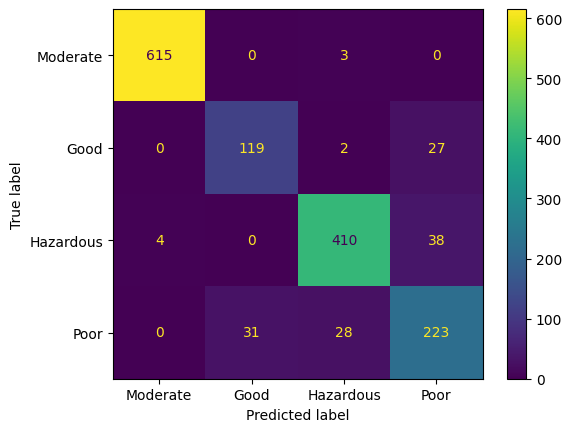

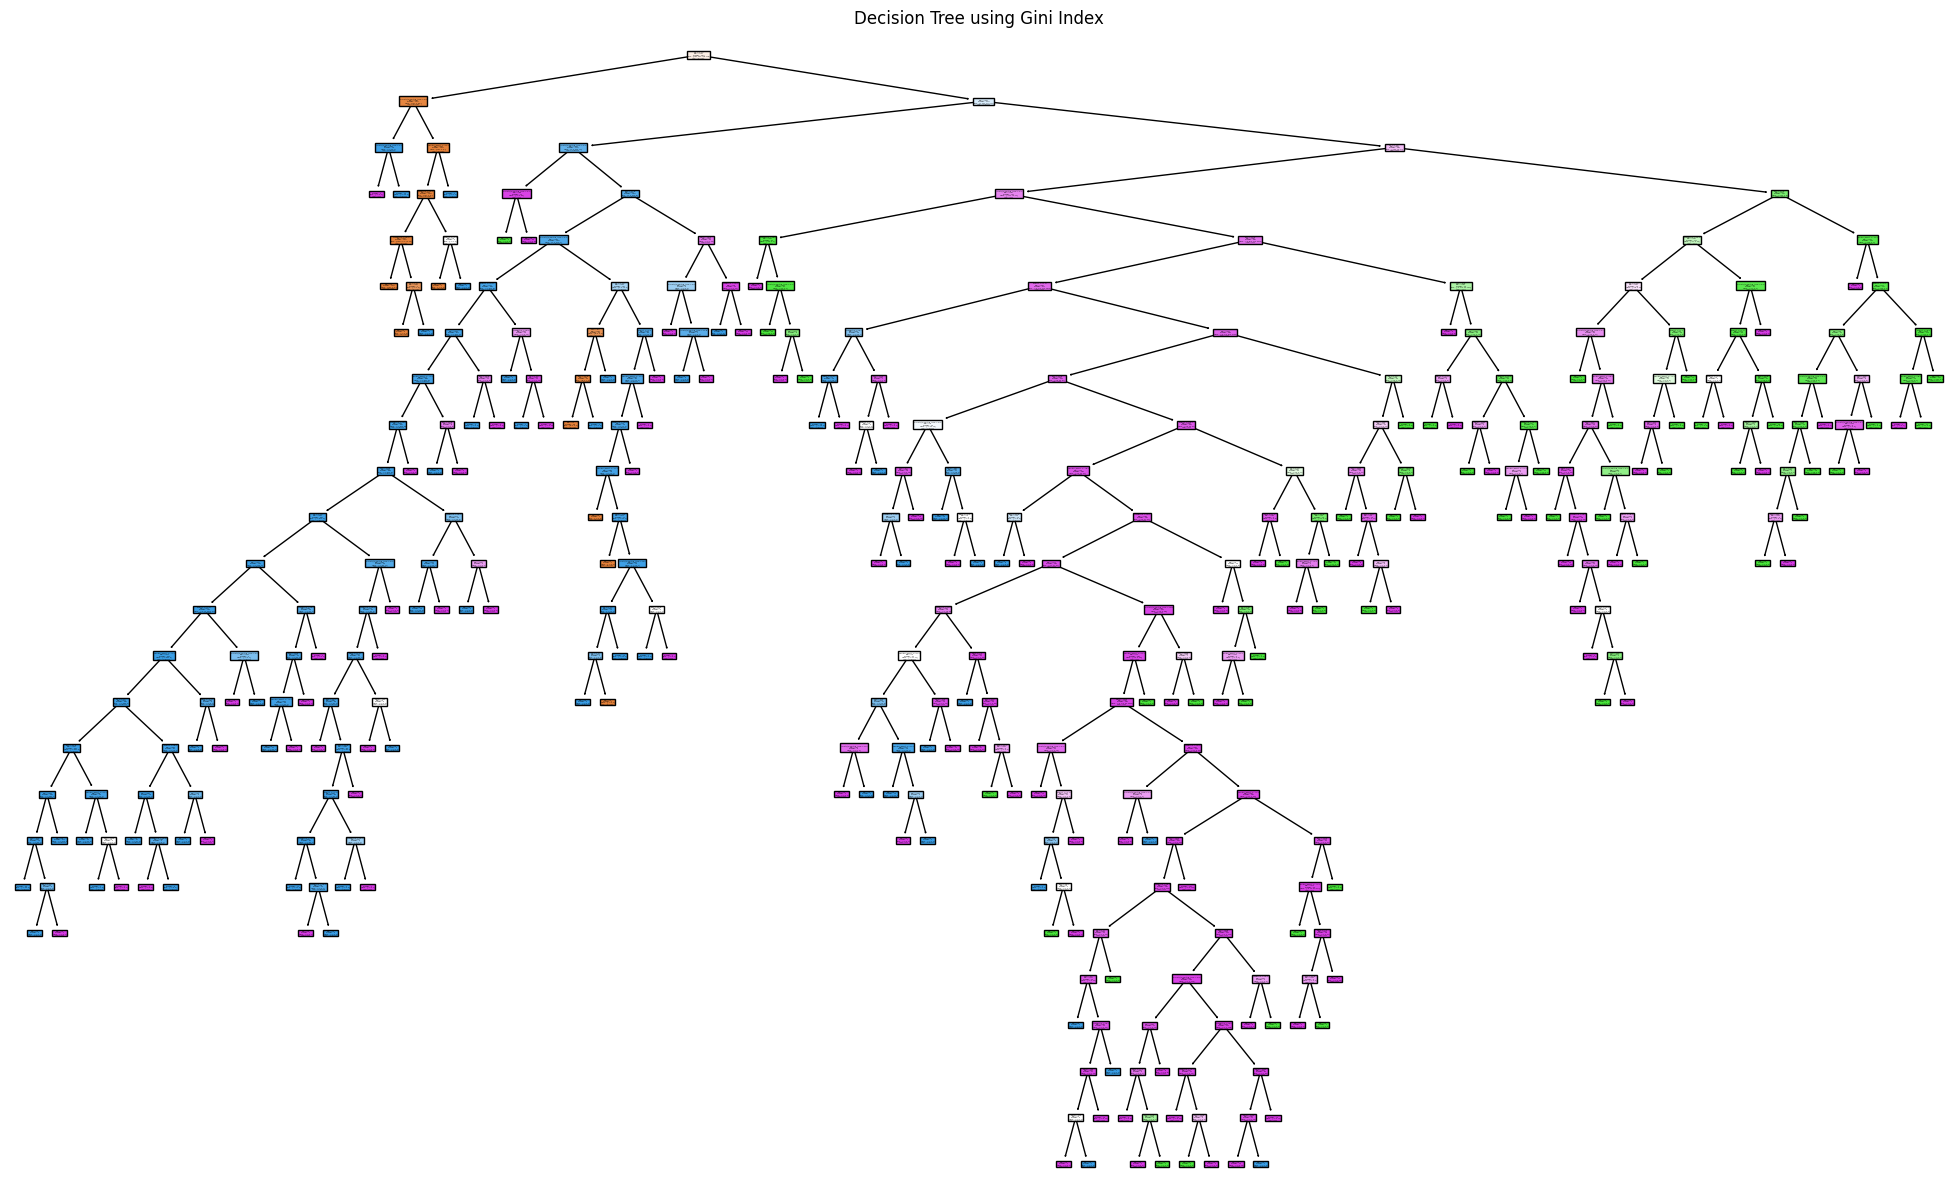

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini')

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Accuracy
print("Accuracy:\n", accuracy_score(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))
#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()



**2) 80% training / 20% testing**



Accuracy:
 0.931

 Confusion Matrix:
 [[408   0   1   0]
 [  0  89   0  22]
 [  3   0 278  13]
 [  0  21   9 156]]


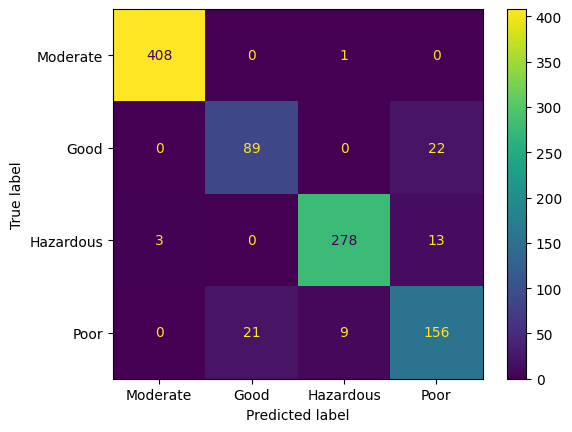

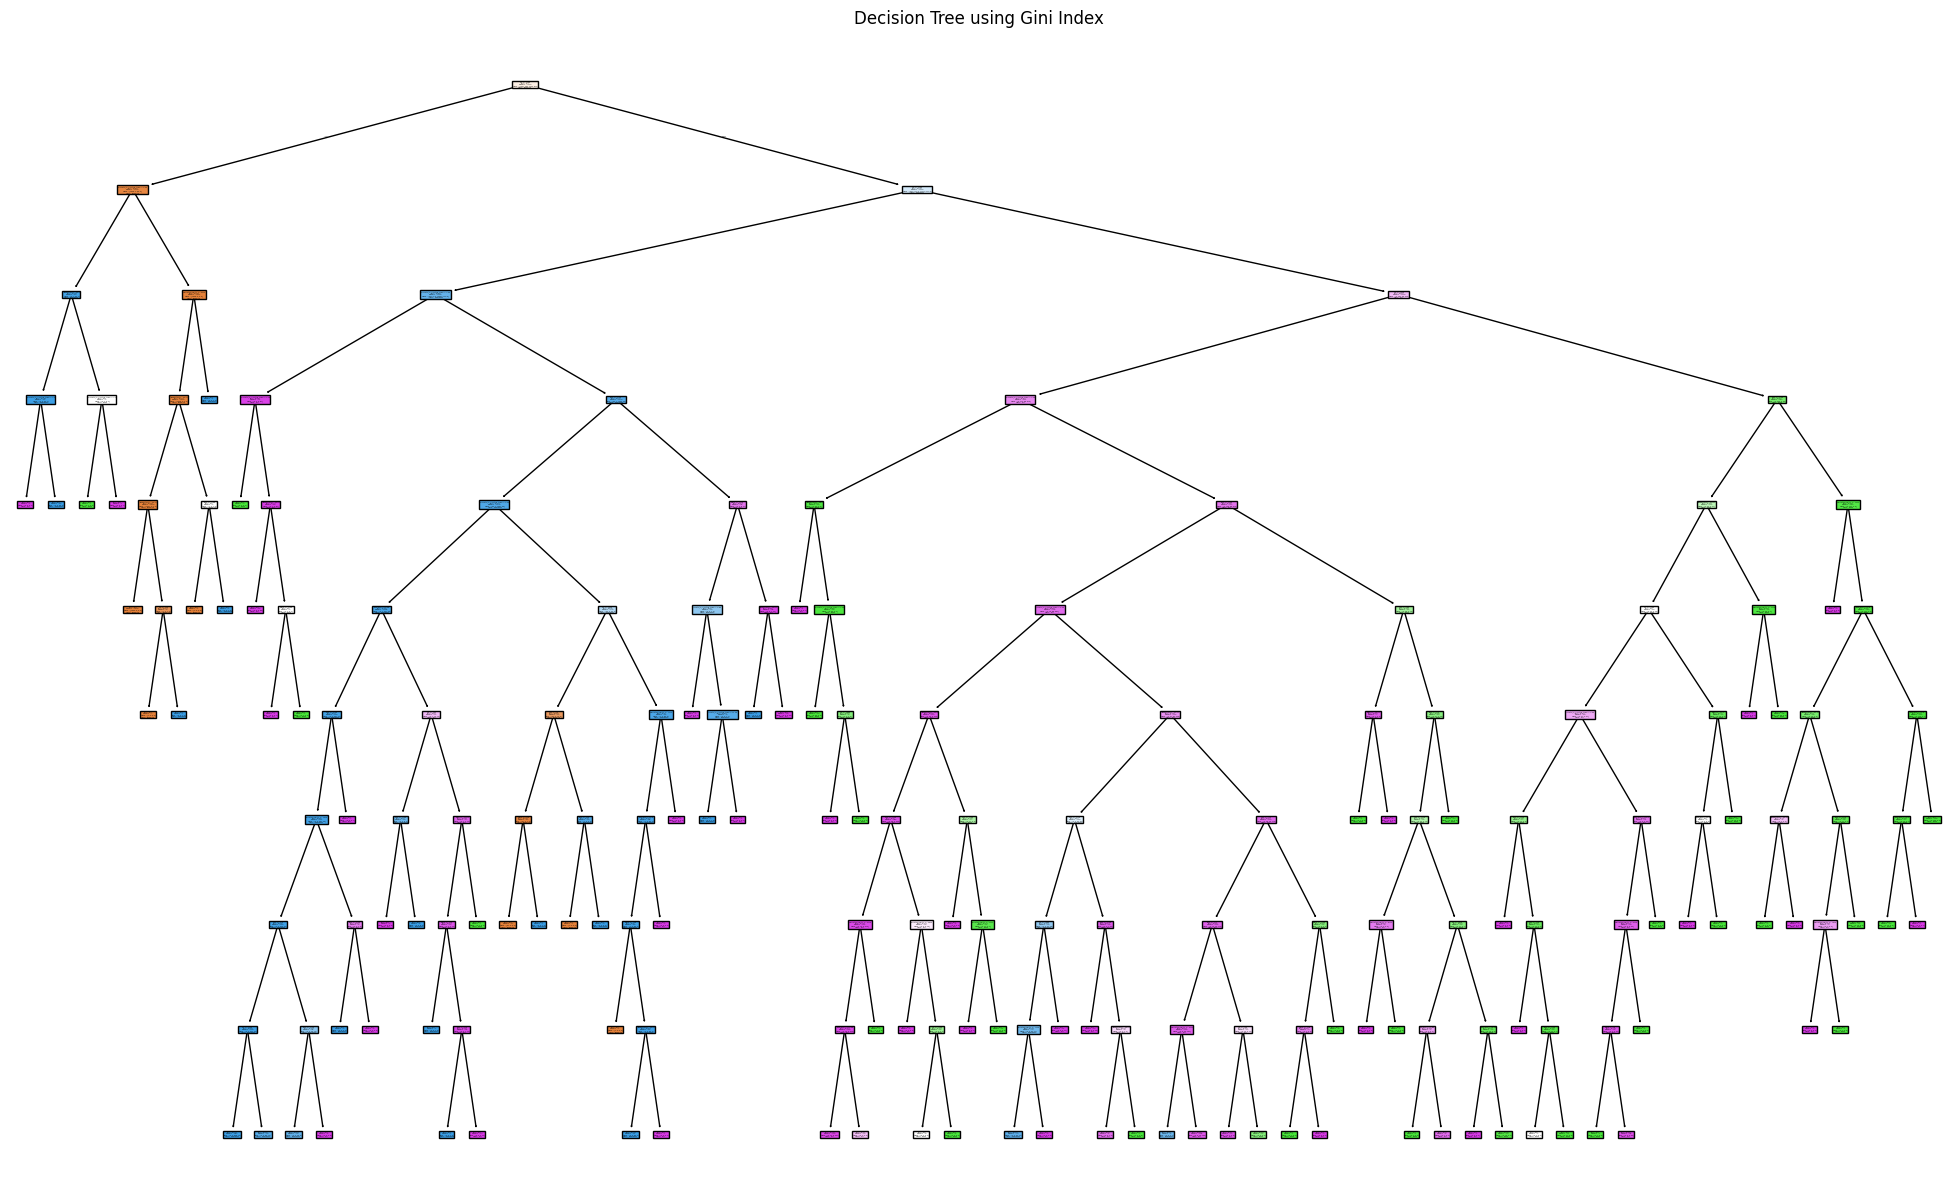

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Accuracy
print("Accuracy:\n", accuracy_score(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()


#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Gini Index')
plt.show()



**3) 60% training / 40% testing**



Accuracy:
 0.9195

 Confusion Matrix:
 [[816   0   1   0]
 [  0 157   1  42]
 [  6   0 562  24]
 [  0  48  39 304]]


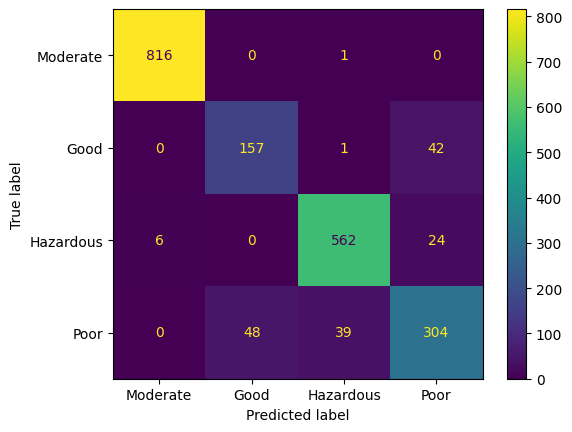

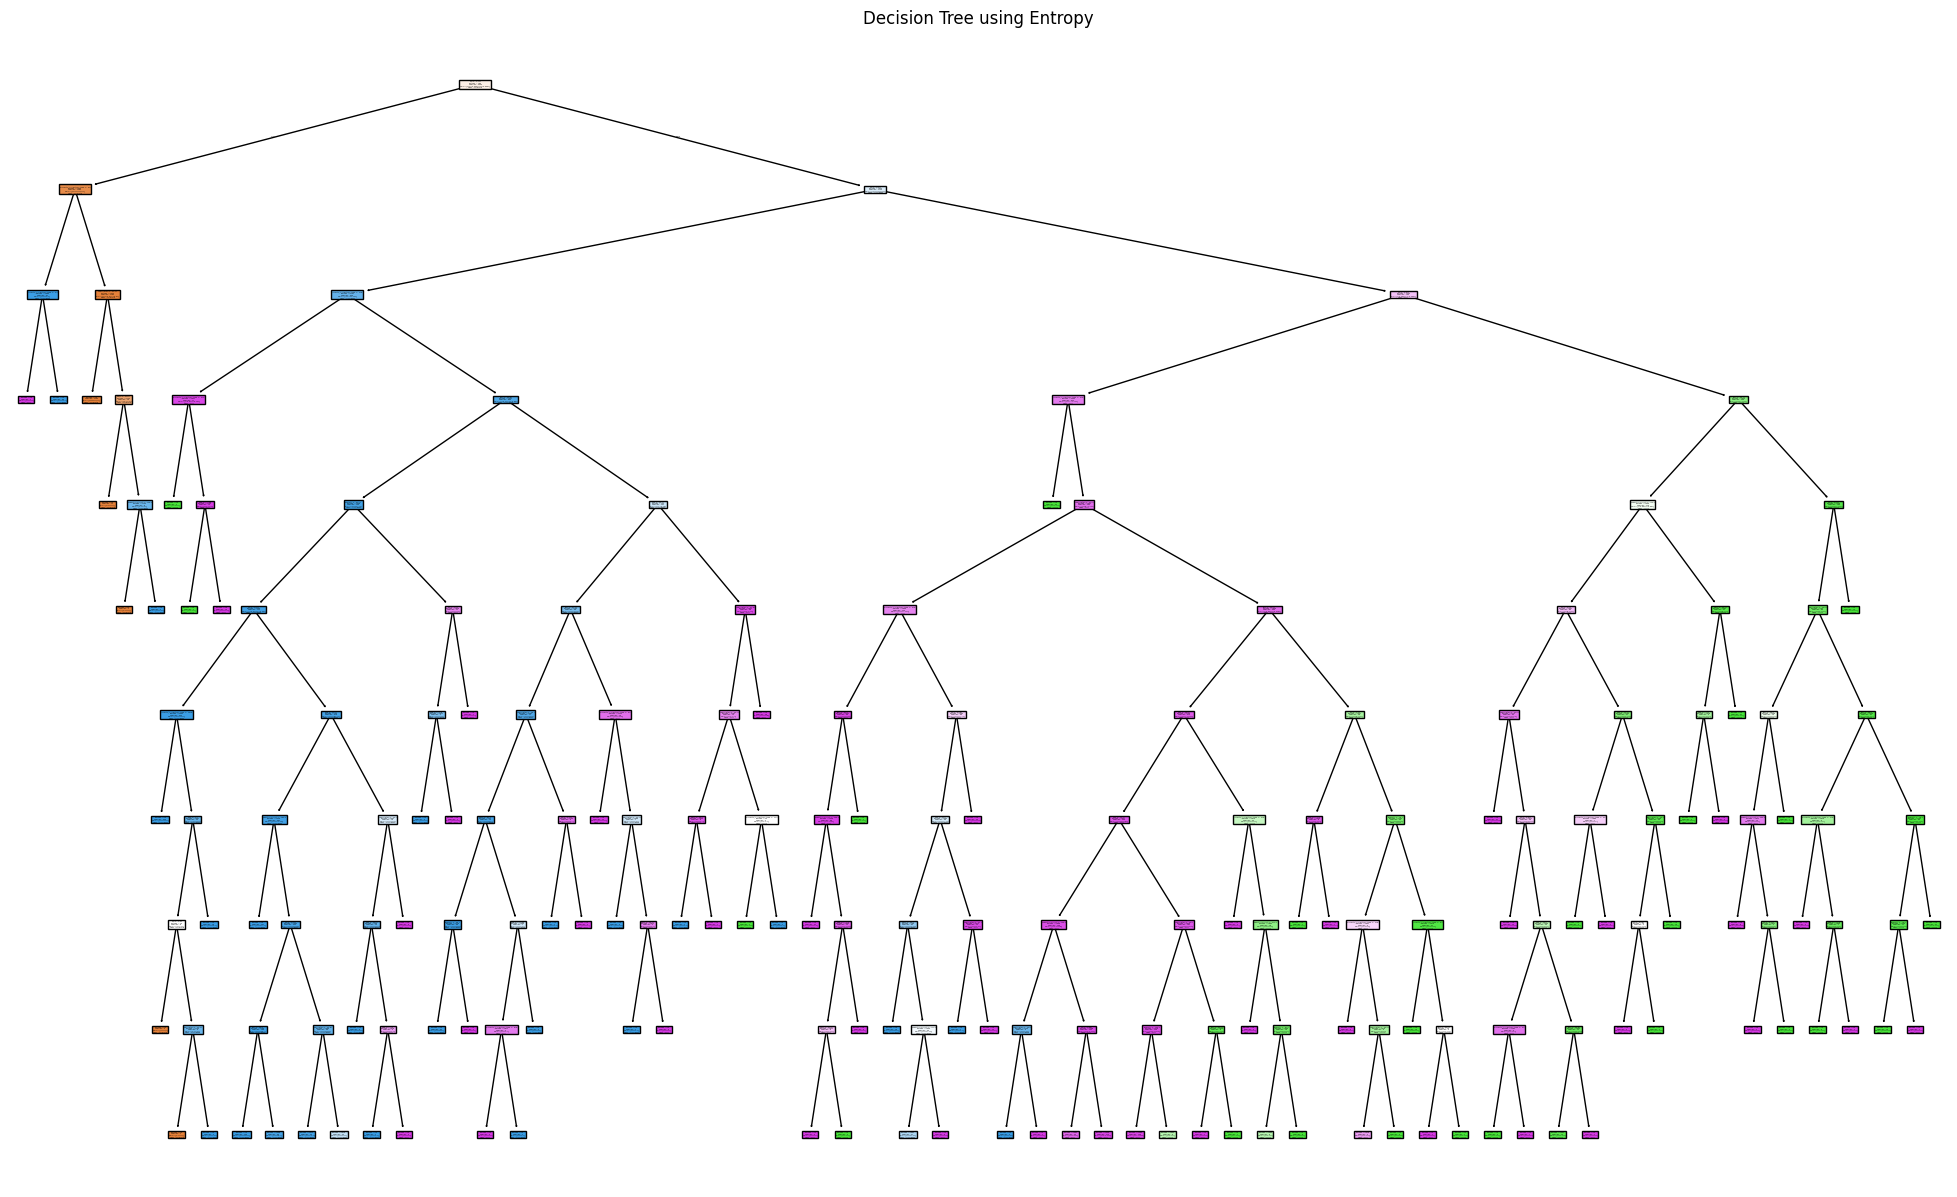

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

#Splitting Data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Building Decision Tree Model:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10)

#train decision tree classifier
clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)

#Evaluating the Model:
#printing the Accuracy
print("Accuracy:\n", accuracy_score(y_test, y_pred))

#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

#Visualizing confusion matrix figure:
cn=df['Air Quality'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)
plt.show()

#Visualizing Decision Trees figure:
plt.figure(figsize=(25, 15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Moderate', 'Good', 'Hazardous','Poor'])
plt.title('Decision Tree using Entropy')
plt.show()


# Clustering


**Preparing for clustering**

In [ ]:
#to prepare for clustering, we need to make sure all values are numeric, since air quality is ordinal we will encode it to numerical labels
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])
print('Encoded Data:\n')
print(df.head(20))


Encoded Data:

    Unnamed: 0  Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3            3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4            4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
5            5         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
6            6         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
7            7         31.0      59.6    5.0  16.8  24.2  13.6  1.38   
8            8         29.4      93.8   10.3  22.7  45.1  11.8  2.03   
9            9         33.2      80.5   11.1  24.4  32.0  15.3  1.69   
10          10         26.3      65.7    1.3   5.5  18.3   5.9  0.85   
11          11         32.5      51.2    1.6  10.5  21.6  19.3  1.53   
12          12         20.0      53.3    3.7  12.

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
#drop the categorical column air quality
df_no_label = df.drop(columns=['Air Quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_label)
df_scaled = pd.DataFrame(scaled_features, columns=df_no_label.columns)
print('Scaled Data (without Air Quality column):\n')
print(df_scaled.head(20))


Scaled Data (without Air Quality column):

    Unnamed: 0  Temperature  Humidity     PM2.5      PM10       NO2       SO2  \
0    -1.731704    -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721   
1    -1.731012    -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643   
2    -1.730319    -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011   
3    -1.729626    -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530   
4    -1.728933    -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083   
5    -1.728240     1.394493  1.673427 -0.225730  0.193138  1.853726  1.168239   
6    -1.727548     1.736756  0.784509 -0.751143 -0.527248  0.527058  0.397826   
7    -1.726855     0.144491 -0.659193 -0.616735 -0.490680 -0.248705  0.531167   
8    -1.726162    -0.093604  1.496904 -0.400868 -0.274930  2.101070  0.264486   
9    -1.725469     0.471873  0.658422 -0.368284 -0.212765  0.628245  0.783033   
10   -1.724776    -0.554915 -0.274626 -0.767435 -0.903896 -0.91203

**Elbow Method**

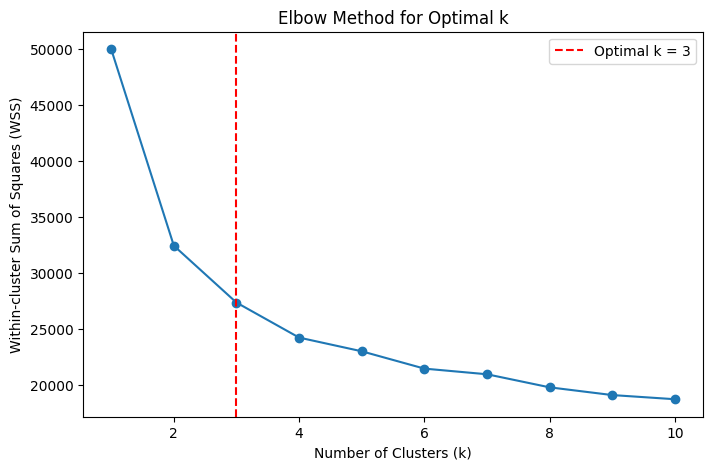

Optimal number of clusters: 3


In [ ]:
!pip install kneed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator
#our standardized dataset
X = df_scaled
#perform k-means clustering for different values of k (1 to 10)
wss_values = []
k_values = range(1, 11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  kmeans.fit(X)
  wss_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to find the turning point (elbow)
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

# Highlight the elbow point
plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Optimal k = {turning_point}')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {turning_point}")

**Silhoutte method**

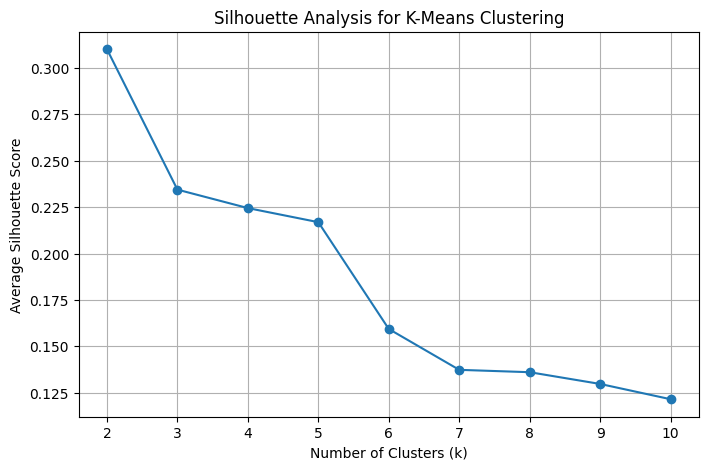

The highest average Silhouette score is 0.310132048759547 with k=2.
The second highest average Silhouette score is 0.23443783693136225 with k=3.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Perform k-means clustering with different values of k (from 1 to 10)
k_values = range(2, 11)
silhouette_avg_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)  # Use your scaled dataset
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)  # Calculate silhouette score
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_avg_values, marker='o', linestyle='-')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid()
plt.show()

# Print the best and second-best k values based on silhouette score
print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


**K-means**

Cluster Centers:
[[-0.02174442  0.76885709  0.68706816  0.52345884  0.64323406  0.79701271
   0.75444604  0.89116735 -0.81088025  0.70762131]
 [ 0.01555304 -0.54993723 -0.4914364  -0.37441224 -0.46008336 -0.57007599
  -0.5396295  -0.63742158  0.57999496 -0.50613737]]

Cluster Labels:
[1 0 0 ... 1 1 0]


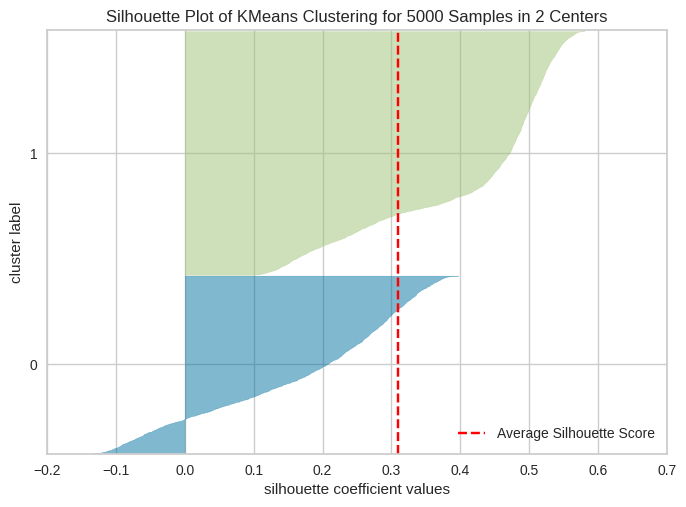

WSS: 32446.121538684518
Average Silhouette Score: 0.3105567152790788


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

Cluster Centers:
[[-0.00916425  0.20743814  0.19950691 -0.11119628 -0.0449986   0.21678844
   0.18630135  0.27273039 -0.58350796  0.19707027]
 [ 0.01706612 -0.73681121 -0.63166113 -0.41110423 -0.54264675 -0.75624841
  -0.71934108 -0.87609545  0.95831732 -0.63831163]
 [-0.01924124  1.22157319  1.00223848  1.15283283  1.31035811  1.24574532
   1.22628805  1.39833988 -0.93736743  1.0222125 ]]

Cluster Labels:
[0 0 0 ... 0 1 0]


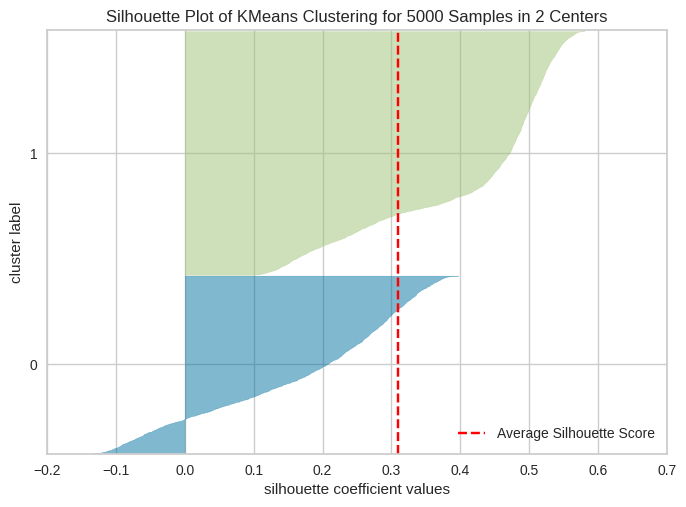

WSS: 27363.574023291174
Average Silhouette Score: 0.23443783693136225


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

Cluster Centers:
[[-0.02174442  0.76885709  0.68706816  0.52345884  0.64323406  0.79701271
   0.75444604  0.89116735 -0.81088025  0.70762131]
 [ 0.01555304 -0.54993723 -0.4914364  -0.37441224 -0.46008336 -0.57007599
  -0.5396295  -0.63742158  0.57999496 -0.50613737]]

Cluster Labels:
[1 0 0 ... 1 1 0]


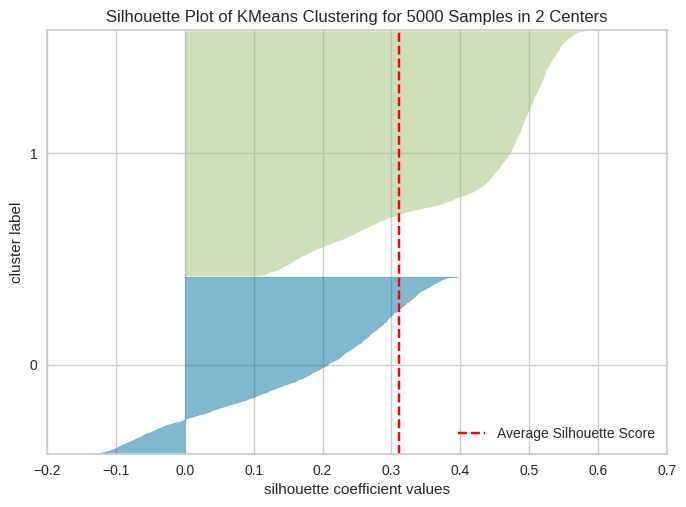

WSS: 32446.121538684518
Average Silhouette Score: 0.3105567152790788


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=4 (random )
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

Cluster Centers:
[[-0.02307017  1.15334105  0.98691061  0.02731404  0.27892403  1.17305939
   1.1973899   1.30744745 -0.96601764  0.98590484]
 [ 0.01528933 -0.74116447 -0.63292011 -0.41704525 -0.55117074 -0.76619084
  -0.72522857 -0.89156093  0.97613232 -0.64436753]
 [-0.00629596  0.93989167  0.75202287  2.72122187  2.67430305  0.96015714
   0.83290394  1.12708401 -0.80546194  0.80003517]
 [-0.00483477  0.07328361  0.0727208  -0.09714985 -0.05969622  0.08913744
   0.05227859  0.13393989 -0.50415337  0.07698628]]

Cluster Labels:
[3 3 3 ... 3 1 2]


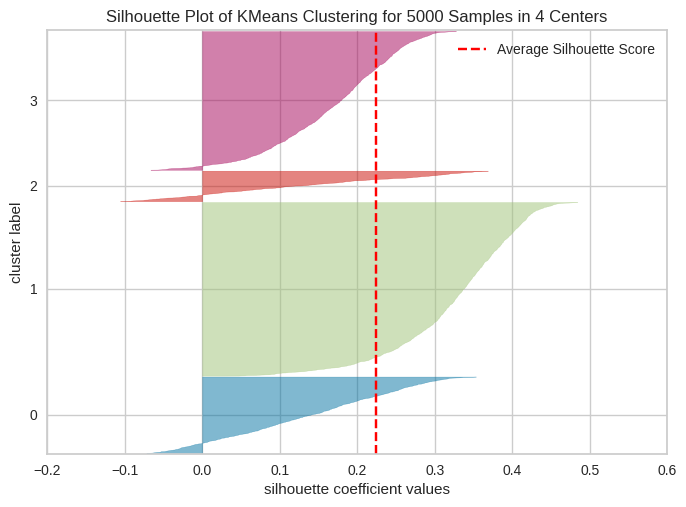

WSS: 24235.442762449253
Average Silhouette Score: 0.2235432662797466


In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

#perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)
cluster_labels = kmeans.fit_predict(df_scaled)


#print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)
wss = kmeans.inertia_

#compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)


#visualizing
kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

#print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

 **Comparing**

 1. WSS: 32446.12, Silhouette Score: 0.3106

Analysis: This configuration has the highest Silhouette Score, indicating better separation between clusters. However, the WSS is the highest, suggesting that the clusters are the least compact. Overall, there’s a balance between separation and cohesion, but the cohesion is not ideal.
2. WSS: 27363.57, Silhouette Score: 0.2344

Analysis: The WSS is lower than the first configuration, indicating that the clusters are more compact. However, the Silhouette Score is lower, meaning the separation between clusters is not as good as in the first configuration. Although the clusters are more compact, they are not as well-separated.
3. WSS: 32446.12, Silhouette Score: 0.3106

Analysis: This configuration has the same values as the first one, so the analysis is the same. The clusters are less compact but have a better separation compared to the other configurations.
4. WSS: 24235.44, Silhouette Score: 0.2235

Analysis: This configuration has the lowest WSS, indicating that the clusters are the most compact. However, it also has the lowest Silhouette Score, meaning the clusters are the least well-separated. While the clusters are tightly packed, their separation is not ideal.



